In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [3]:
# Prepear data
df.isna().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [5]:
del df['student_id']
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [6]:
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,18,Male,Medium,Secondary,1


In [7]:
df = df.fillna(0)

In [8]:
df.parent_education_level.isnull().sum()

0

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)


In [10]:
len(df), (len(df_train) + len(df_test) + len(df_val)), len(df_train), len(df_val), len(df_test)

(5000, 5000, 3000, 1000, 1000)

In [11]:
y_test = df_test.jamb_score
y_val = df_val.jamb_score
y_train = df_train.jamb_score

len(y_test), len(y_val), len(y_train)

(1000, 1000, 3000)

In [12]:
del df_test['jamb_score']
del df_train['jamb_score']
del df_val['jamb_score']

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

dr = DecisionTreeRegressor(max_depth=1)
dr.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = dr.predict(X_val)

In [14]:
from sklearn.tree import export_text
names = dv.get_feature_names_out()
print(export_text(dr, feature_names=names))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [15]:
# Answer for question 1, Which feature is used for splitting the data? is study_hours_per_week

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = rfr.predict(X_val)


In [17]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_val, y_pred)
np.round(rmse,3)

42.137

In [18]:
# Answer for the question 2 , What's the RMSE of this model on the validation data? is 42.13

In [19]:
n_est = np.arange(10, 201, 10)
n_est

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [20]:
rmse_values = []
for estimator in n_est:
    rfr = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)

    rmse_values.append((estimator, rmse))
    

In [21]:
rmse_values

[(10, 42.13724207871227),
 (20, 41.46121464694444),
 (30, 41.106170947924596),
 (40, 40.917193933296545),
 (50, 40.852278663496854),
 (60, 40.78428140159447),
 (70, 40.677098222414024),
 (80, 40.53933283129176),
 (90, 40.50434592594835),
 (100, 40.51680451861919),
 (110, 40.59335280539747),
 (120, 40.6248503681005),
 (130, 40.650840905587195),
 (140, 40.5948515491302),
 (150, 40.596715029667116),
 (160, 40.60350763548252),
 (170, 40.62754627591216),
 (180, 40.641313925139386),
 (190, 40.63135509073867),
 (200, 40.60101912236933)]

In [22]:

df_rmse = pd.DataFrame(rmse_values, columns=['n_estimators', 'RMSE'])
df_rmse.RMSE = np.round(df_rmse.RMSE, 3)
df_rmse[df_rmse.RMSE == df_rmse.RMSE.min()]

,n_estimators,RMSE
8,90,40.504


In [23]:
df_rmse

,n_estimators,RMSE
0,10,42.137
1,20,41.461
2,30,41.106
3,40,40.917
4,50,40.852
5,60,40.784
6,70,40.677
7,80,40.539
8,90,40.504
9,100,40.517


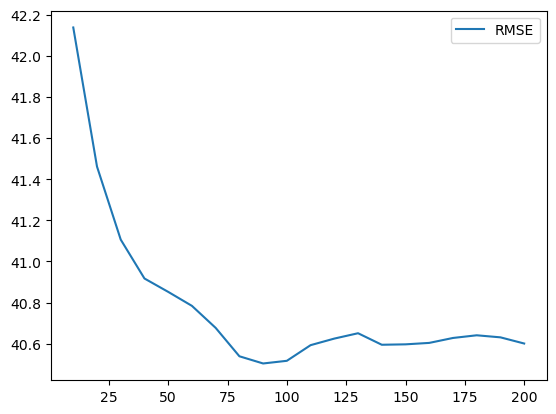

In [27]:
plt.plot(df_rmse.n_estimators, df_rmse.RMSE, label = 'RMSE')
plt.legend()
plt.show()

In [ ]:
# Answer for question 3, After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer. is 80
# from the given options 80 is closer to the actual / correct n_estimator that is 90. So selected 80

In [28]:
rmse_values = []
for depth in [10, 15, 20, 25]:
    for estimator in n_est:
        rfr = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1, max_depth=depth)
        rfr.fit(X_train, y_train)
    
        y_pred = rfr.predict(X_val)
    
        rmse = root_mean_squared_error(y_val, y_pred)
    
        rmse_values.append((depth, estimator, rmse))
        

In [29]:
df_rmse = pd.DataFrame(rmse_values, columns=['depth', 'n_estimators', 'RMSE'])
df_rmse.RMSE = np.round(df_rmse.RMSE, 3)
df_rmse.groupby('depth')["RMSE"].mean().sort_values(ascending=True)

depth
10    40.39240
15    40.73535
20    40.73970
25    40.78785
Name: RMSE, dtype: float64

In [ ]:
# Answer for the question 4, What's the best max_depth, using the mean RMSE? is 10

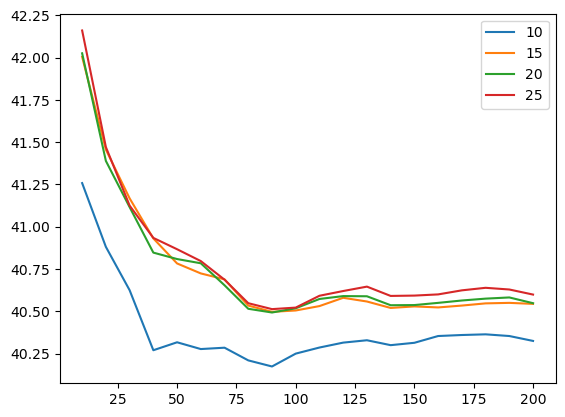

In [30]:
for depth in [10, 15, 20, 25]:
    df_rmse_ss = df_rmse[df_rmse.depth == depth]
    plt.plot(df_rmse_ss.n_estimators, df_rmse_ss.RMSE, label = depth)

plt.legend()
plt.show()

In [32]:
# For ansswering question 5 lets createa RandomForestRegressor with given parameters
rfr = RandomForestRegressor(n_estimators = 10, max_depth = 20, random_state = 1, n_jobs = 8)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=8, random_state=1)

In [33]:
rfr.feature_importances_

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [36]:
features_df = pd.DataFrame()
features_df['feature_name'] = dv.get_feature_names_out()
features_df['importance'] = rfr.feature_importances_
features_df


,feature_name,importance
0,access_to_learning_materials=No,0.012325
1,access_to_learning_materials=Yes,0.010262
2,age,0.069311
3,assignments_completed,0.031517
4,attendance_rate,0.149729
5,distance_to_school,0.136486
6,extra_tutorials=No,0.013459
7,extra_tutorials=Yes,0.009131
8,gender=Female,0.009289
9,gender=Male,0.010383


In [38]:
features_df.sort_values(by='importance', ascending=False).head(1)

,feature_name,importance
27,study_hours_per_week,0.248354


In [39]:
# Asnwer for the question 5, What's the most important feature (among these 4)? is study_hours_per_week